In [2]:
# importing basic libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [3]:
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


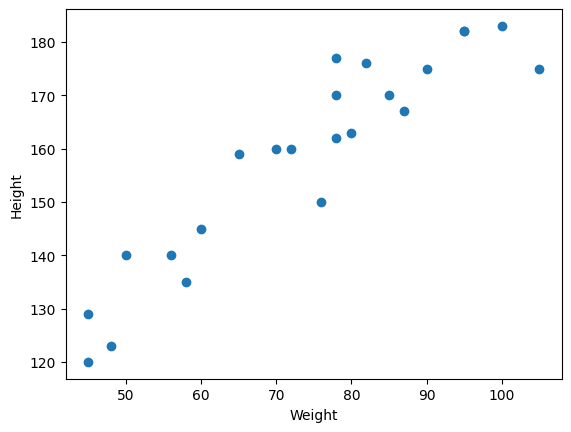

In [4]:
## visualization
plt.scatter(df['Weight'],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [5]:
## divide dataset into independent and dependent fetures:
x=df[["Weight"]] # independent feature
y=df['Height']  # dependent feature

In [6]:
x.shape

(23, 1)

In [7]:
y.shape

(23,)

## Train Test Split


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [9]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

# standardize the data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [11]:
x_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [12]:
x_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

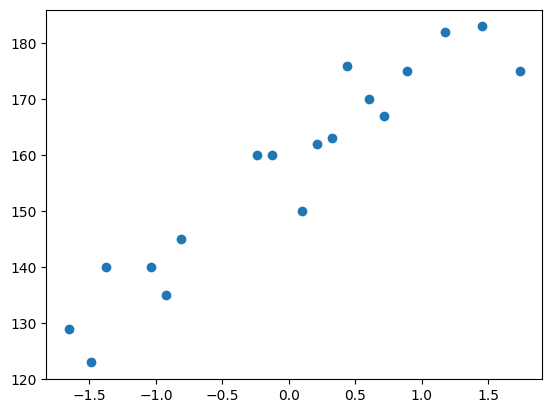

In [14]:
plt.scatter(x_train,y_train)

# Train Simple Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(n_jobs=-1)
regressor

LinearRegression(n_jobs=-1)

In [17]:
regressor.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [18]:
## find the slope and intercept:
print("The slope or coefficeint:",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficeint: [17.03440872]
Intercept: 157.5


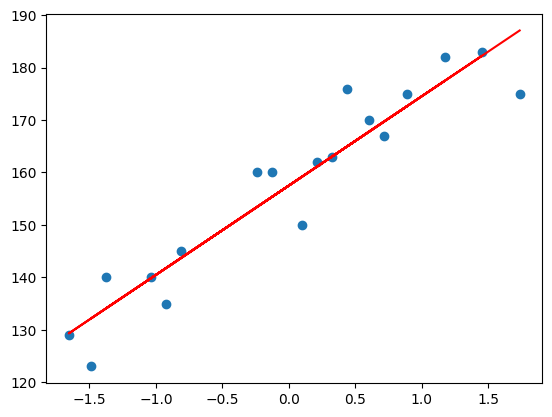

In [19]:
## Getting Bestfit line:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),"r")

# predictions for test data

In [21]:
y_pred_test=regressor.predict(x_test)

y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [22]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

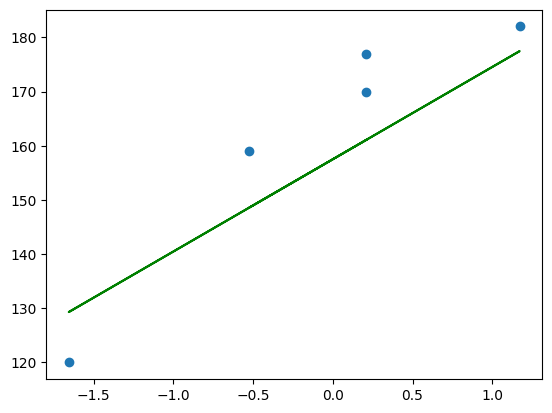

In [24]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),'g')

# performance matrics

1. MSE,MAE,RMSE

2. R-square, Adjusted R-square

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mae)

print(mae)
print(mse)
print(rmse)

9.822657814519232
109.77592599051664
3.1341119658555967


In [29]:
from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred_test)
print(score)

print("-------------------------------------------------------")

# adjusted R-square
print(1-(1-score)*(len(y_test)-1) / (len(y_test)-x_test.shape[1]-1))

0.776986986042344
-------------------------------------------------------
0.7026493147231252


In [30]:
regressor

LinearRegression(n_jobs=-1)

# predictions for new data:

In [44]:
# new data point weight=80

scaled_weight=scaler.transform([[80]])

scaled_weight[0]

c:\myproject\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.32350772])

In [46]:
print('The height prediction for weight 80 kg is :',regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


# Assumptions:

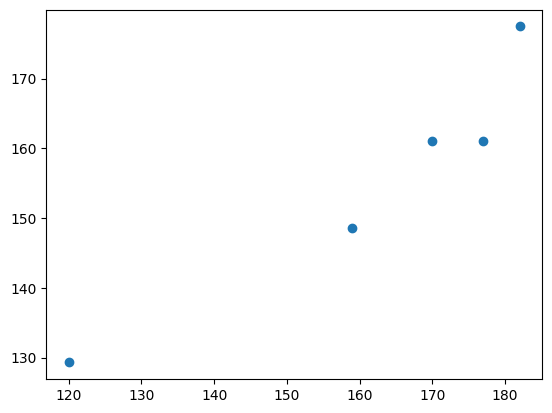

In [47]:
## scatter plot fot the predictions:

plt.scatter(y_test,y_pred_test)

In [48]:
# Residuals:
residuals=y_test - y_pred_test

residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

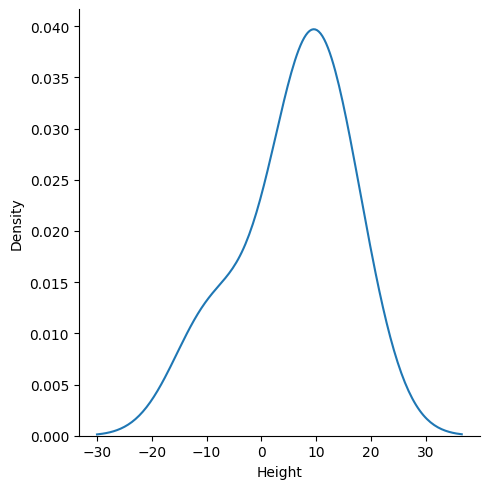

In [52]:
# plot residuals:

import seaborn as sns

sns.displot(residuals,kind="kde")

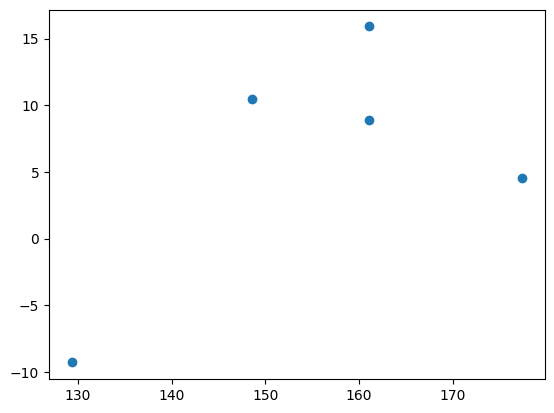

In [53]:
## scatter plot with respect to predictions and residuals
## uniform distribution

plt.scatter(y_pred_test,residuals)

